<a href="https://colab.research.google.com/github/akbarroyhan69-gif/running-pace-analyst-/blob/main/evaluasi_dan_visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Library joblib digunakan untuk menyimpan dan memuat model machine learning yang telah dilatih. Pandas dimanfaatkan untuk pengolahan dan analisis data dalam bentuk tabel atau DataFrame. Evaluasi kinerja model regresi dilakukan menggunakan mean absolute error (MAE), mean squared error (MSE), dan koefisien determinasi (R²) yang disediakan oleh modul sklearn.metrics. NumPy digunakan untuk mendukung operasi numerik dan perhitungan matematis. Visualisasi data dilakukan menggunakan Matplotlib sebagai pustaka utama pembuatan grafik, sedangkan Seaborn digunakan untuk menghasilkan visualisasi statistik yang lebih informatif dan estetis.

# Memuat kembali model

In [ ]:

X_test = pd.read_csv("X_test (1).csv")
y_test = pd.read_csv("y_test (1).csv")

model = joblib.load("model_trained_fix (1).pkl")

Data uji X_test dan y_test dibaca dari file berformat CSV menggunakan library pandas. Selanjutnya, model machine learning yang telah dilatih sebelumnya dimuat kembali menggunakan library joblib dari file berekstensi .pkl. Model yang dimuat ini kemudian digunakan untuk melakukan pengujian dan evaluasi kinerja berdasarkan data uji yang tersedia.

In [ ]:
y_pred = model.predict(X_test)

Variabel y_pred digunakan untuk menyimpan hasil prediksi yang dihasilkan oleh model machine learning terhadap data uji X_test dengan menggunakan metode predict().

# Menghitung metrik evaluasi

In [ ]:


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 0.15431673367443766
RMSE: 0.2408779327768684
R2  : 0.9956490615907825


Nilai Mean Absolute Error (MAE) dihitung untuk mengukur rata-rata selisih absolut antara nilai aktual (y_test) dan nilai prediksi (y_pred). Root Mean Squared Error (RMSE) diperoleh dari akar kuadrat Mean Squared Error (MSE) untuk memberikan ukuran kesalahan prediksi dalam satuan yang sama dengan variabel target. Sementara itu, koefisien determinasi (R²) digunakan untuk mengetahui kemampuan model dalam menjelaskan variasi data target.

# visualisasi perbandingan

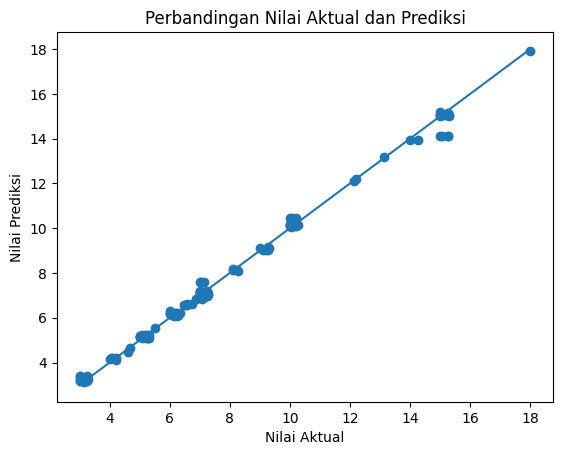

In [ ]:

plt.scatter(y_test, y_pred)
plt.plot([y_test.min().values[0], y_test.max().values[0]],
         [y_test.min().values[0], y_test.max().values[0]])
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Perbandingan Nilai Aktual dan Prediksi")
plt.show()

Visualisasi dilakukan menggunakan grafik scatter untuk menggambarkan hubungan antara nilai aktual (y_test) dan nilai prediksi (y_pred). Garis diagonal yang dibentuk dari nilai minimum hingga maksimum data aktual merepresentasikan kondisi prediksi ideal, yaitu ketika nilai prediksi sama dengan nilai aktual. Grafik ini digunakan untuk mengevaluasi seberapa dekat hasil prediksi model terhadap nilai sebenarnya, di mana semakin dekat titik-titik data dengan garis diagonal menunjukkan kinerja model yang semakin baik.

# Residual plot

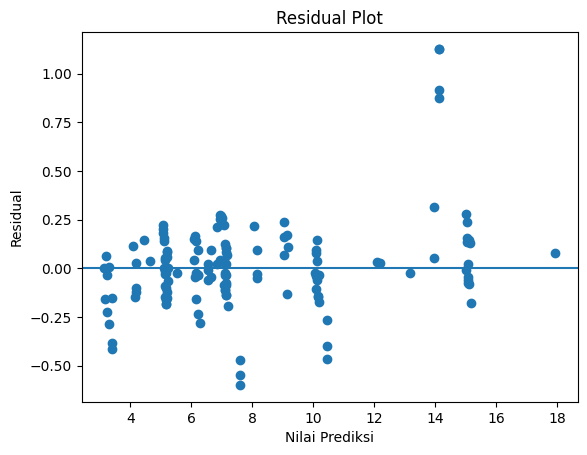

In [ ]:
residual = y_test.values.flatten() - y_pred

plt.scatter(y_pred, residual)
plt.axhline(0)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

Residual dihitung sebagai selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred). Grafik scatter antara nilai prediksi dan residual kemudian dibuat untuk membentuk residual plot, dengan garis horizontal pada nilai nol sebagai acuan. Visualisasi ini digunakan untuk mengevaluasi pola kesalahan prediksi model, di mana penyebaran residual yang acak di sekitar garis nol menunjukkan bahwa model tidak mengalami bias sistematis dan memiliki kinerja yang baik.

# evaluasi metrik

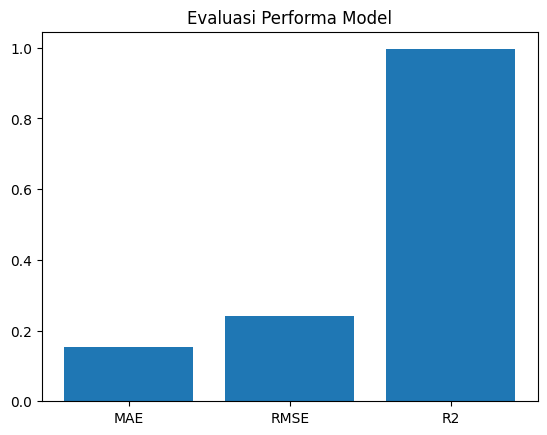

In [ ]:
metrics = ["MAE", "RMSE", "R2"]
values = [mae, rmse, r2]

plt.bar(metrics, values)
plt.title("Evaluasi Performa Model")
plt.show()

Visualisasi evaluasi kinerja model dilakukan menggunakan grafik batang (bar chart) yang menampilkan nilai MAE, RMSE, dan R². Grafik ini digunakan untuk memudahkan perbandingan antar metrik evaluasi sehingga kinerja model regresi dapat dianalisis secara visual. Semakin kecil nilai MAE dan RMSE serta semakin mendekati satu nilai R² menunjukkan performa model yang semakin baik.

# Feature importance

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
3,imt,0.208735
5,latihan_per_minggu,0.196911
0,semester,0.195803
1,tinggi,0.158641
2,berat,0.119155
4,usia,0.082421
6,perokok,0.038334


 menampilkan tingkat kepentingan fitur (feature importance) pada model machine learning. Nilai kepentingan fitur diperoleh dari atribut feature_importances_ pada model, yang menunjukkan kontribusi masing-masing fitur dalam proses prediksi. Hasilnya disusun ke dalam bentuk DataFrame yang berisi nama fitur dan nilai kepentingannya, kemudian diurutkan secara menurun untuk mengidentifikasi fitur yang paling berpengaruh terhadap output model.

# Heatmap feature importance

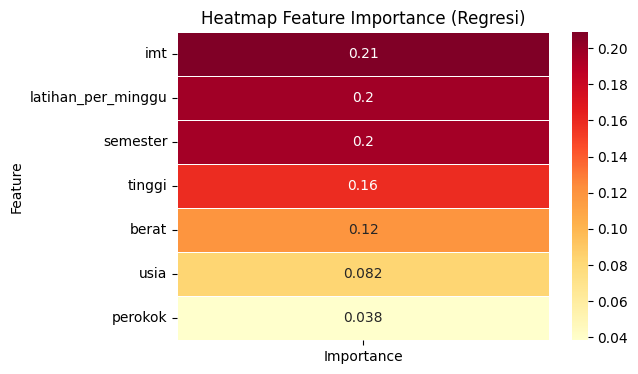

In [ ]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    feature_importance[['Importance']].set_index(feature_importance['Feature']),
    annot=True,          # tampilkan nilai
    cmap="YlOrRd",       # warna heatmap
    linewidths=0.5
)

plt.title("Heatmap Feature Importance (Regresi)")
plt.show()

Visualisasi feature importance dilakukan menggunakan heatmap untuk menunjukkan tingkat kontribusi masing-masing fitur terhadap model regresi. Nilai kepentingan fitur ditampilkan secara numerik (annotated) dan direpresentasikan melalui gradasi warna, di mana warna yang semakin gelap menunjukkan tingkat pengaruh fitur yang semakin besar. Heatmap ini bertujuan untuk memudahkan interpretasi dan perbandingan pengaruh antar fitur dalam proses pengambilan keputusan oleh model.